# Exploring the Lego Dataset
### Author: Bryce Drynan
### Date 6/6/24


In [114]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import string as str
import seaborn as sns


In [56]:
directory = "C:/Users/bryce/Downloads/Lego_Data/"

for file in os.listdir(directory):
    name = directory+file
    if '.csv' in name :
        globals()[file[:-4]] = pd.read_csv(name)
    
    

In [57]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [58]:
parts.head()

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [59]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [60]:
parts = parts.merge(part_categories, left_on= 'part_cat_id', right_on = 'id')

In [61]:
parts.drop(columns = 'id', inplace=True)
parts.columns = ['part_num', 'name', 'part_cat_id','part_category']

In [62]:
sets = sets.merge(themes, left_on='theme_id', right_on='id')


In [63]:
sets.drop(columns =['theme_id'], inplace=True)
sets.columns = ['set_num', 'set_name', 'year_released', 'num_parts', 'theme_id', 'theme_name', 'parent_id']

In [64]:
inventory_parts = inventory_parts.merge(colors, left_on='color_id', right_on='id')

In [66]:
inventory_parts.drop(columns=['color_id'], inplace = True)
inventory_parts.columns = ['inventory_id', 'part_num', 'quantity', 'is_spare', 'color_id',
       'color_name', 'rgb', 'is_trans']

In [67]:
part_inventory_full = inventory_parts.merge(parts, on='part_num')

In [69]:
part_inventory_full.columns = ['inventory_id', 'part_num', 'quantity', 'is_spare', 'color_id',
       'color_name', 'rgb', 'is_trans', 'part_name', 'part_cat_id',
       'part_category']

In [70]:
part_inventory_full.head()

,inventory_id,part_num,quantity,is_spare,color_id,color_name,rgb,is_trans,part_name,part_cat_id,part_category
0,1,48379c01,1,f,72,Dark Bluish Gray,6C6E68,f,Sports Promo Figure Base with Feet,27,Minifig Accessories
1,15767,48379c01,1,f,72,Dark Bluish Gray,6C6E68,f,Sports Promo Figure Base with Feet,27,Minifig Accessories
2,738,48379c01,1,f,0,Black,05131D,f,Sports Promo Figure Base with Feet,27,Minifig Accessories
3,11896,48379c01,1,f,15,White,FFFFFF,f,Sports Promo Figure Base with Feet,27,Minifig Accessories
4,1733,48379c01,1,f,1,Blue,0055BF,f,Sports Promo Figure Base with Feet,27,Minifig Accessories


In [82]:
minifig_parts = part_inventory_full[part_inventory_full['part_category'].str.contains('Minifigs')]

In [83]:
minifig_parts.head()

,inventory_id,part_num,quantity,is_spare,color_id,color_name,rgb,is_trans,part_name,part_cat_id,part_category
40038,28,970c00,1,f,72,Dark Bluish Gray,6C6E68,f,Legs and Hips [Complete Assembly],13,Minifigs
40039,395,970c00,2,f,72,Dark Bluish Gray,6C6E68,f,Legs and Hips [Complete Assembly],13,Minifigs
40040,403,970c00,2,f,72,Dark Bluish Gray,6C6E68,f,Legs and Hips [Complete Assembly],13,Minifigs
40041,432,970c00,1,f,72,Dark Bluish Gray,6C6E68,f,Legs and Hips [Complete Assembly],13,Minifigs
40042,505,970c00,1,f,72,Dark Bluish Gray,6C6E68,f,Legs and Hips [Complete Assembly],13,Minifigs


In [84]:
minifig_parts.reset_index(inplace=True, drop=True)
minifig_parts.head()

,inventory_id,part_num,quantity,is_spare,color_id,color_name,rgb,is_trans,part_name,part_cat_id,part_category
0,28,970c00,1,f,72,Dark Bluish Gray,6C6E68,f,Legs and Hips [Complete Assembly],13,Minifigs
1,395,970c00,2,f,72,Dark Bluish Gray,6C6E68,f,Legs and Hips [Complete Assembly],13,Minifigs
2,403,970c00,2,f,72,Dark Bluish Gray,6C6E68,f,Legs and Hips [Complete Assembly],13,Minifigs
3,432,970c00,1,f,72,Dark Bluish Gray,6C6E68,f,Legs and Hips [Complete Assembly],13,Minifigs
4,505,970c00,1,f,72,Dark Bluish Gray,6C6E68,f,Legs and Hips [Complete Assembly],13,Minifigs


## Top 10 colors produced

In [119]:
top10_colors = minifig_parts.groupby(['color_name']).size().nlargest(10).reset_index(name='counts')

In [120]:
top10_colors

,color_name,counts
0,Yellow,6239
1,Black,5376
2,White,4150
3,Red,1902
4,Blue,1833
5,Light Flesh,1799
6,Tan,1098
7,Dark Bluish Gray,990
8,Light Bluish Gray,959
9,Dark Blue,868


C:\Users\bryce\AppData\Local\Temp\ipykernel_15524\3403142374.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top10_colors, y='color_name',  x= 'counts', palette='viridis')


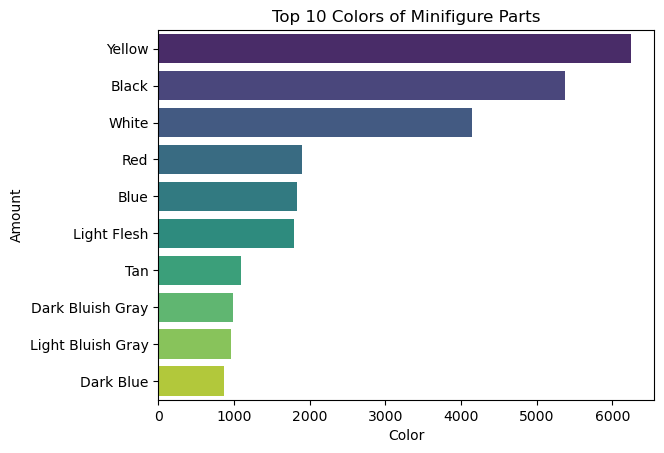

In [121]:
sns.barplot(data = top10_colors, y='color_name',  x= 'counts', palette='viridis')
plt.xlabel('Color')
plt.ylabel('Amount')
plt.title('Top 10 Colors of Minifigure Parts')
plt.show()